In [1]:
import time
start_time=time.time()

In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import lmfit
from scipy import interpolate
import pickle

from bfunc import bfunc00,bfunc01,bfunc02

Data load and region parameters

In [3]:
Sample='orion'

samples=pd.read_csv('SampleList//'+Sample+'.csv',header=None)

DataNO=dict()
DataO=dict()


for i in range(len(samples)):
    DataNO[i]=samples[0][i]
    
for i in range(len(samples)):
    DataO[i]=pd.read_csv('SFdata//'+DataNO[i]+'.csv')    



samples

,0
0,1951VHOrion1
1,1951VHOrion2
2,1958MchOrion
3,2016ArthOrionH
4,Orion1
5,Orion2


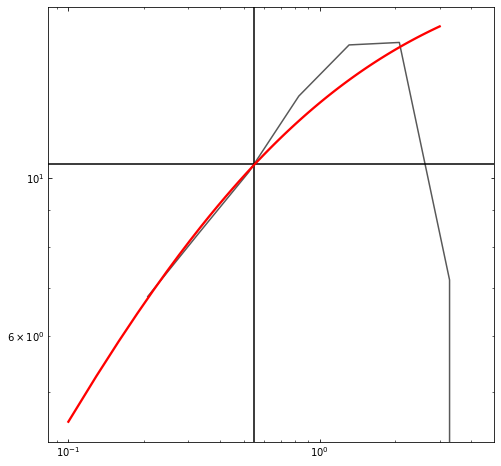

In [4]:
fig, ax=plt.subplots(figsize=(8,8))

plt.loglog(DataO[5].pc,DataO[5].S,color="black",alpha=0.65)

plt.axhline(y=3.23**2, color='black', linestyle='-')
plt.axvline(x=0.55, color='black', linestyle='-')

lo=0.55
ss=3.23**2
n=0.75
x=np.linspace(0.1,3,100)
c=1/(1+(x/lo)**n)
y=2*(1-c)*ss
plt.loglog(x,y,color='r', linestyle='-',linewidth='2.3')

#ax.text(0.83, 0.15,'m = 1.15', ha='center', va='center', transform=ax.transAxes, color='red')
#ax.text(0.83, 0.20,'r$_{0}$ = 1.5 pc', ha='center', va='center', transform=ax.transAxes, color='red')
#ax.text(0.84, 0.25,'σ = 2.7 km/s', ha='center', va='center', transform=ax.transAxes, color='red')
    
#ax.set(xlabel='r [pc]', ylabel='B(r) [km$^{2}$/s$^{2}$]')
plt.tick_params(which='both', labelright=False, direction='in', right=True,  top=True)


In [5]:
rgrid = np.logspace(0.1, 3)

s0 = (0.00242)/2.355             
m = 0.75

sig2 = ss
r0 = 0.55

B=DataO[5].S[0:6]
r=DataO[5].pc[0:6]

In [6]:
model02 = lmfit.Model(bfunc02)
model02.param_names

['r0', 'sig2', 'm', 's0', 'noise']

In [7]:
relative_uncertainty = 0.1
weights = 1.0 / (relative_uncertainty * B)
weights[r > r0] /= 1.25

In [8]:
for p in model02.param_names:
    model02.set_param_hint(p, min=0.0)

#model02.set_param_hint("sig2", value=sig2, vary=False)
#model02.set_param_hint("s0", min=0.2)
model02.print_param_hints()

Name      Value      Min      Max     Vary    Expr    
m           nan        0      inf     True    
noise       nan        0      inf     True    
r0          nan        0      inf     True    
s0          nan        0      inf     True    
sig2        nan        0      inf     True    


In [9]:
B

0     6.810619
1     8.340333
2    10.177724
3    13.012774
4    15.351810
5    15.474844
Name: S, dtype: float64

In [10]:
result2 = model02.fit(
    B, 
    weights=weights,
    r=r, r0=r0, m=m, s0=s0, noise=1/10, sig2=sig2
)

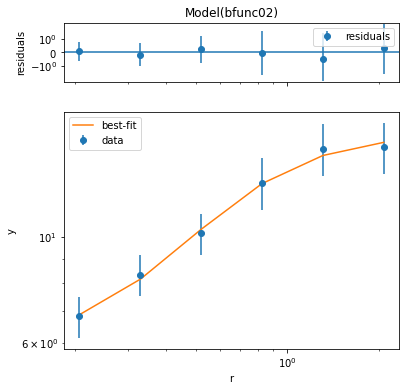

In [11]:
fig, _ = result2.plot()
fig.axes[0].set(
    xscale="log",
    yscale="symlog",
)
fig.axes[1].set(
    xscale="log",
    yscale="log",
);

In [12]:
print(result2.fit_report())

[[Model]]
    Model(bfunc02)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 75
    # data points      = 6
    # variables        = 5
    chi-square         = 0.20138977
    reduced chi-square = 0.20138977
    Akaike info crit   = -10.3656353
    Bayesian info crit = -11.4068379
##  Warning: uncertainties could not be estimated:
    s0:     at initial value
[[Variables]]
    r0:     0.60133880 (init = 0.55)
    sig2:   5.28333893 (init = 10.4329)
    m:      2.17681436 (init = 0.75)
    s0:     0.00102760 (init = 0.001027601)
    noise:  5.92109287 (init = 0.1)


In [13]:
for p in result2.model.param_names:
    result2.params[p].stderr = result2.params[p].value * 0.1

In [14]:
result2.conf_interval()
print(result2.ci_report())

C:\Users\ZAINTEL2\anaconda3\lib\site-packages\lmfit\confidence.py:312: UserWarning: Bound reached with prob(r0=0.0) = 0.9550757838187549 < max(sigmas)
  warn(errmsg)
C:\Users\ZAINTEL2\anaconda3\lib\site-packages\lmfit\confidence.py:327: UserWarning: rel_change=-0.2605493506254645 < 1e-05 at iteration 78 and prob(r0=5.29178140533655) = 0.706231408189675 < max(sigmas).
  warn(errmsg)
C:\Users\ZAINTEL2\anaconda3\lib\site-packages\lmfit\confidence.py:327: UserWarning: rel_change=-0.008289632897720995 < 1e-05 at iteration 9 and prob(sig2=0.5283338927885033) = 0.9471585561804337 < max(sigmas).
  warn(errmsg)
C:\Users\ZAINTEL2\anaconda3\lib\site-packages\lmfit\confidence.py:327: UserWarning: rel_change=-0.26997197688196417 < 1e-05 at iteration 44 and prob(sig2=28.53003021057929) = 0.7235881992591726 < max(sigmas).
  warn(errmsg)
C:\Users\ZAINTEL2\anaconda3\lib\site-packages\lmfit\confidence.py:312: UserWarning: Bound reached with prob(m=0.0) = 0.9550757839438895 < max(sigmas)
  warn(errmsg)
C

          99.73%    95.45%    68.27%    _BEST_    68.27%    95.45%    99.73%
 r0   :      -inf  -0.55007  -0.23233   0.60134  +1.88963      +inf      +inf
 sig2 :      -inf      -inf  -1.34244   5.28334 +12.30254      +inf      +inf
 m    :      -inf  -2.16937  -1.61022   2.17681  +1.78885      +inf      +inf
 s0   :      -inf      -inf      -inf   0.00103      +inf      +inf      +inf
 noise:      -inf      -inf      -inf   5.92109  +1.26493  +4.72176 +48.29987


In [15]:
plt.style.use([
    "seaborn-poster",
])

In [16]:
plot_limits = {
    "s0": [0.0, 1],
    "m": [0.0, 3.0],
    "r0": [0.0, 8.0],
    "noise": [0.0, 2.0],
}

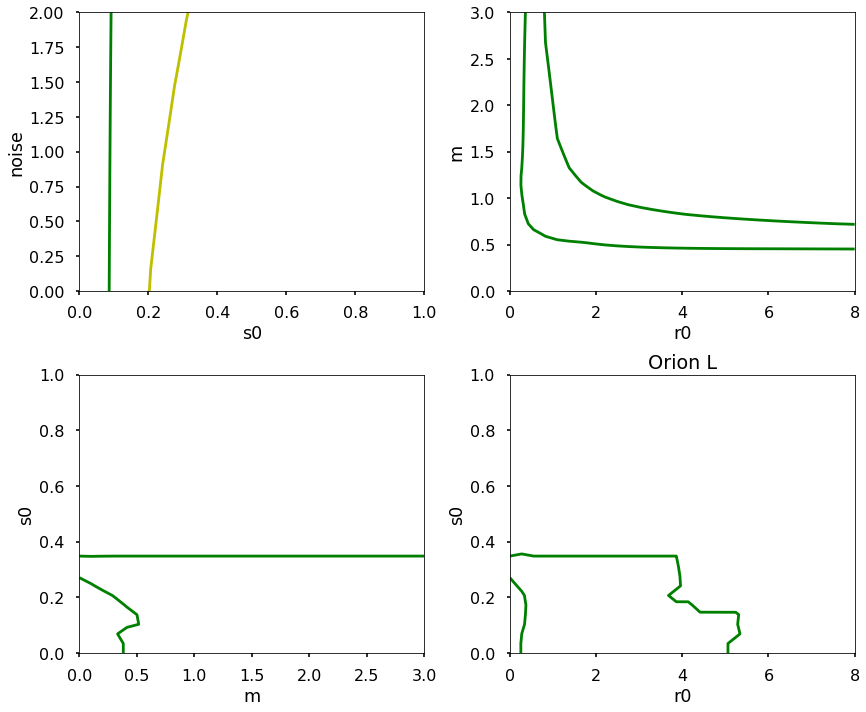

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

plt.title('Orion L')
levels = [0.6827, 0.9545, 0.9973]
colors = ["g", "y", "r"]

for ax, [xvar, yvar] in zip(axes.flat, [
    ["s0", "noise"],
    ["r0", "m"],
    ["m", "s0"],
    ["r0", "s0"],
]):
    cx, cy, grid = lmfit.conf_interval2d(
        result2, result2, xvar, yvar, 30, 30,
        limits=[plot_limits[xvar], plot_limits[yvar]],
    )
    ctp = ax.contour(cx, cy, grid, levels, colors=colors)
    ax.set_xlabel(xvar)
    ax.set_ylabel(yvar)

fig.tight_layout();

In [18]:
x=r
y=B-2*sig2
tck=interpolate.splrep(x,y,s=0)
grid=np.linspace(x.min(),x.max(),num=len(x))
ynew=interpolate.splev(grid,tck,der=0)
inter=pd.DataFrame([grid,ynew]).T
SFr=interpolate.sproot(tck)
SFr

array([], dtype=float64)

In [19]:
r.max()

2.0731282523497216

In [20]:
r.max()/result2.params['r0'].value

3.447521207561534

In [21]:
(r[0]/2**0.5)*((result2.params['r0'].value/r[0])**(result2.params['m'].value/2))

0.46725998714620576

In [22]:
f = open('CI//OrionL.pkl',"wb")
pickle.dump(result2,f)
f.close()

In [23]:
print("--- %s seconds ---" % (time.time()-start_time))

--- 1003.5474042892456 seconds ---
